In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns;
sns.set()

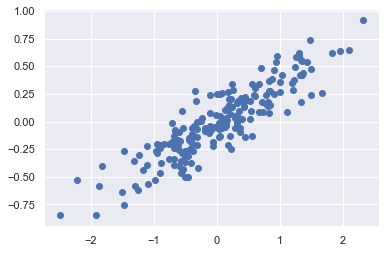

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:,0], X[:,1])

In [57]:
%%HTML
<h2>Visualizing the Principle Components<h2>

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [10]:
pca.explained_variance_

array([0.7625315, 0.0184779])

In [12]:
pca.explained_variance_ratio_

array([0.97634101, 0.02365899])

In [43]:
plt.annotate?

(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593763,
 1.0195904306706842)

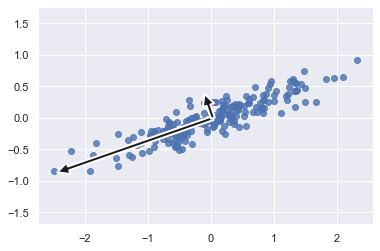

In [56]:
def plot_PC(v0, v1, ax = None):
    ax = ax or plt.gca()
    ax.annotate('', v1, v0, arrowprops = {'facecolor' : 'k', 'linewidth' : 2, 'shrinkA' : 0, 'shrinkB' : 0})
    

plt.scatter(X[:,0], X[:,1], alpha = .8)
for v, w in zip(pca.components_,pca.explained_variance_):
    v = 3 * v * (w ** .5)
    plot_PC(pca.mean_, pca.mean_ + v)
plt.axis('equal')


## Dimensionality Reduction

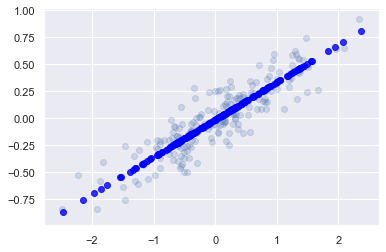

In [62]:
pca = PCA(n_components = 1)
lower = pca.fit_transform(X)
X_new = pca.inverse_transform(lower)
plt.scatter(X[:,0], X[:,1], alpha = .2)
plt.scatter(X_new[:,0], X_new[:,1], alpha = .8, color = 'blue')

In [63]:
%%HTML
<h3>Visualizing the Digit Data</h3>

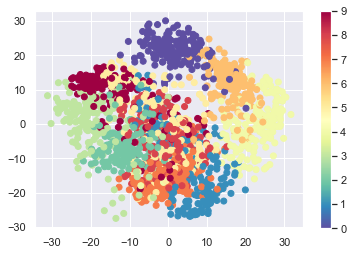

In [69]:
from sklearn.datasets import load_digits
digits = load_digits()
pca = PCA(2)
lower = pca.fit_transform(digits.data)
plt.scatter(lower[:,0], lower[:,1], c = digits.target, cmap = 'Spectral_r')
plt.colorbar?
plt.colorbar()

## Chosing the number of Dimensions

Text(0, 0.5, 'Cumulative explained variance')

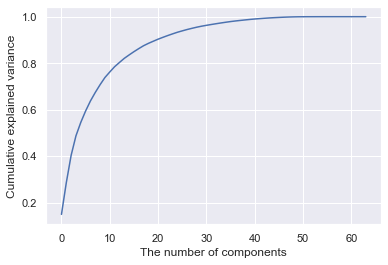

In [73]:
model = PCA()
model.fit(digits.data)
plt.plot(range(64), np.cumsum(model.explained_variance_ratio_))
plt.xlabel('The number of components')
plt.ylabel('Cumulative explained variance')

## Noise Filtering

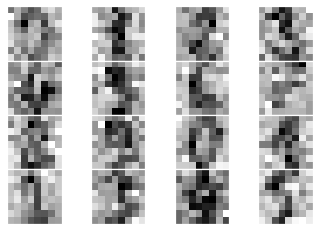

In [80]:
np.random.seed(101)
noise = np.random.normal(digits.images, 4)
fig, axes = plt.subplots(4,4,subplot_kw = {'xticks' : [], 'yticks': []}, gridspec_kw = {'wspace' : 0, 'hspace' : 0})
for i, ax in enumerate(axes.flat):
    ax.imshow(noise[i], interpolation = 'nearest', cmap = 'binary')

(1797, 64)
(1797, 64)


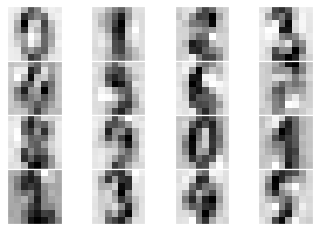

In [87]:
model = PCA(.5)
noise = noise.reshape((len(noise), -1))
print(noise.shape)
noise_pca = model.fit_transform(noise)
denoised = model.inverse_transform(noise_pca)
print(denoised.shape)
fig, axes = plt.subplots(4,4,subplot_kw = {'xticks' : [], 'yticks': []}, gridspec_kw = {'wspace' : 0, 'hspace' : 0})
for i, ax in enumerate(axes.flat):
    ax.imshow(denoised[i].reshape((8,8)), interpolation = 'nearest', cmap = 'binary')


# Example: Eigen Face

In [104]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

from sklearn.decomposition import PCA
model = PCA(150)
faces_pca = model.fit_transform(faces.data)


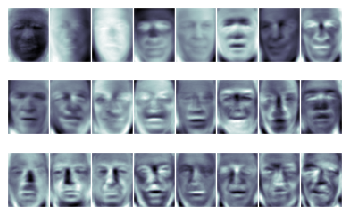

In [105]:
fig, axes = plt.subplots(3,8,subplot_kw = {'xticks' : [], 'yticks' : []}, gridspec_kw = {'hspace' : 0, 'wspace' : 0})
for i, ax in enumerate(axes.flat):
    ax.imshow(model.components_[i].reshape((62, 47)), cmap = 'bone')

Text(0, 0.5, 'Cumulative explained variance')

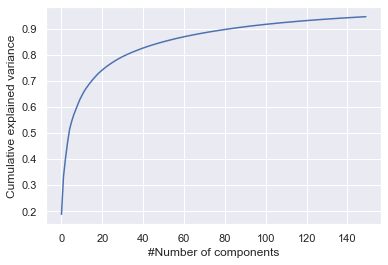

In [106]:
plt.plot(range(150), np.cumsum(model.explained_variance_ratio_))
plt.xlabel('#Number of components')
plt.ylabel('Cumulative explained variance')

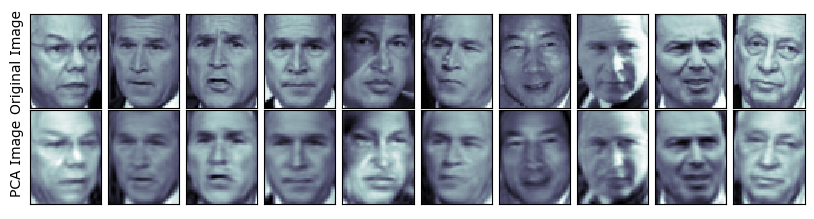

In [114]:
sns.reset_defaults()
fig, axes = plt.subplots(2,10, subplot_kw = {'xticks' : [], 'yticks' : []}, gridspec_kw = {'wspace' : .1, 'hspace' : 0}, figsize = (10, 2.5))
faces_reduced = model.inverse_transform(faces_pca).reshape((-1, 62, 47))
for i in range(10):
    axes[0, i].imshow(faces.images[i], cmap = 'bone')
    axes[1, i].imshow(faces_reduced[i], cmap = 'bone')
    axes[0, 0].set_ylabel('Original Image')
    axes[1, 0].set_ylabel('PCA Image')